In [1]:
import sys

# setting path
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np

from paralling_testing_framework import run_parallel, params

In [2]:
params_Q_alfa_01 = params.copy()
params_Q_alfa_01["alfa"] = 0.1
params_Q_alfa_01["implementation"] = "Q_Learning"  

params_Q_ck_01 = params.copy()
params_Q_ck_01["alfa"] = 0.1  
params_Q_ck_01["implementation"] = "Q_Learning_ck"

params_Q_colf_01 = params.copy()
params_Q_colf_01["alfa"] = 0.1  
params_Q_colf_01["implementation"] = "Q_Learning_colf"

params_Q_ck_colf_01 = params.copy()
params_Q_ck_colf_01["alfa"] = 0.1  
params_Q_ck_colf_01["implementation"] = "Q_Learning_CK_COLF"

_params = [params_Q_alfa_01, params_Q_ck_01, params_Q_colf_01, params_Q_ck_colf_01]

trials = 3

rewards_list = []

for t in range(trials):

    results = run_parallel(_params)
    rewards_list.append(results)




100%|██████████| 10000/10000 [02:55<00:00, 56.83it/s]


In [3]:
rewards_list

[[[0.15444444444444444,
   0.16111111111111115,
   0.1444444444444444,
   0.13333333333333333,
   0.11666666666666668,
   0.11333333333333333,
   0.08222222222222221,
   0.10666666666666665,
   0.11333333333333334,
   0.1111111111111111,
   0.11666666666666665,
   0.09555555555555555,
   0.10555555555555557,
   0.10888888888888891,
   0.09666666666666666,
   0.09444444444444446,
   0.13777777777777778,
   0.08888888888888889,
   0.08444444444444443,
   0.1388888888888889,
   0.11222222222222222,
   0.14333333333333337,
   0.11777777777777776,
   0.11333333333333333,
   0.1411111111111111,
   0.11555555555555556,
   0.11666666666666665,
   0.10111111111111111,
   0.10555555555555556,
   0.12222222222222222,
   0.11222222222222222,
   0.10777777777777775,
   0.13444444444444445,
   0.12333333333333334,
   0.12333333333333334,
   0.11111111111111109,
   0.11666666666666668,
   0.11666666666666665,
   0.11,
   0.13,
   0.11444444444444446,
   0.10666666666666667,
   0.10000000000000002,
  

In [4]:
my_array = np.array(rewards_list)

average_payoffs = np.mean(my_array, axis=0)

average_payoffs.shape

(4, 10000)

In [5]:
transposed_array = np.transpose(average_payoffs)

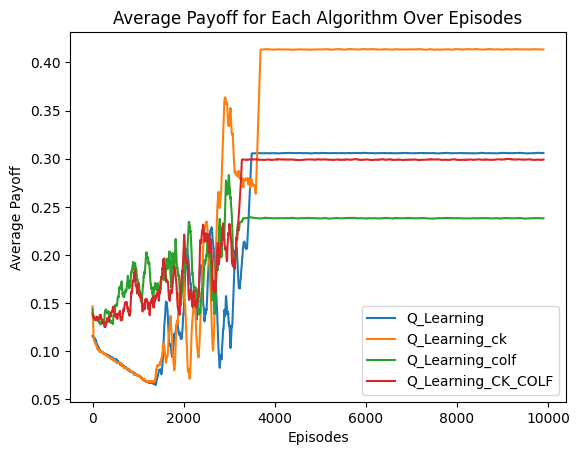

In [6]:
# Calculate the average payoff for each algorithm
# average_payoffs = np.mean(average_payoffs, axis=0)

# Transpose the array for plotting
# average_payoffs = np.transpose(average_payoffs)

# Set the window size for smoothing the plot
window_size = 100

# Create a plot
fig, ax = plt.subplots()

# List of tuples, each containing the relevant imports
implementations = [
    ("Q_Learning"),
    ("Q_Learning_ck"),
    ("Q_Learning_colf"),
    ("Q_Learning_CK_COLF")
]

# Plot each line for different algorithms with smoothing
for i, algo_name in enumerate(implementations):
    smoothed_values = np.convolve(transposed_array[:, i], np.ones(window_size)/window_size, mode='valid')
    ax.plot(smoothed_values, label=algo_name)

# Set labels and title
ax.set_xlabel('Episodes')
ax.set_ylabel('Average Payoff')
ax.set_title('Average Payoff for Each Algorithm Over Episodes')

# Add legend
ax.legend()

# Show the plot
plt.show()